In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [3]:
df = pd.read_csv("Healthcare_sheet2.csv")

In [4]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [6]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [7]:
df.shape

(3424, 69)

In [8]:
df.isnull().sum()

Ptid                                                                  0
Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                  

In [9]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Ptid, Persistency_Flag, Gender, Race, Ethnicity, Region, Age_Bucket, Ntm_Speciality, Ntm_Specialist_Flag, Ntm_Speciality_Bucket, Gluco_Record_Prior_Ntm, Gluco_Record_During_Rx, Dexa_Freq_During_Rx, Dexa_During_Rx, Frag_Frac_Prior_Ntm, Frag_Frac_During_Rx, Risk_Segment_Prior_Ntm, Tscore_Bucket_Prior_Ntm, Risk_Segment_During_Rx, Tscore_Bucket_During_Rx, Change_T_Score, Change_Risk_Segment, Adherent_Flag, Idn_Indicator, Injectable_Experience_During_Rx, Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, Comorb_Encounter_For_Immunization, Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx, Comorb_Vitamin_D_Deficiency, Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified, Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, Comorb_Long_Term_Current_Drug_Therapy, Comorb_Dorsalgia, Comorb_Personal_History_Of_Other_Diseases_And_Conditions, Comorb_Other_Disorders_Of_Bone_Density_And_Structure, Comorb_Disorders_of_lipoprotein_metabolism_a

In [10]:
for col in df.columns:
    print(col, '--', df[col].nunique())

Ptid -- 3424
Persistency_Flag -- 2
Gender -- 2
Race -- 4
Ethnicity -- 3
Region -- 5
Age_Bucket -- 4
Ntm_Speciality -- 36
Ntm_Specialist_Flag -- 2
Ntm_Speciality_Bucket -- 3
Gluco_Record_Prior_Ntm -- 2
Gluco_Record_During_Rx -- 2
Dexa_Freq_During_Rx -- 58
Dexa_During_Rx -- 2
Frag_Frac_Prior_Ntm -- 2
Frag_Frac_During_Rx -- 2
Risk_Segment_Prior_Ntm -- 2
Tscore_Bucket_Prior_Ntm -- 2
Risk_Segment_During_Rx -- 3
Tscore_Bucket_During_Rx -- 3
Change_T_Score -- 4
Change_Risk_Segment -- 4
Adherent_Flag -- 2
Idn_Indicator -- 2
Injectable_Experience_During_Rx -- 2
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms -- 2
Comorb_Encounter_For_Immunization -- 2
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx -- 2
Comorb_Vitamin_D_Deficiency -- 2
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified -- 2
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx -- 2
Comorb_Long_Term_Current_Drug_Therapy -- 2
Comorb_Dorsalgia -- 2
Comorb_Personal_History_Of_Other_Diseases_And

In [11]:
for col in df:
    print(col, '--', df[col].unique())

Ptid -- ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag -- ['Persistent' 'Non-Persistent']
Gender -- ['Male' 'Female']
Race -- ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity -- ['Not Hispanic' 'Hispanic' 'Unknown']
Region -- ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket -- ['>75' '55-65' '65-75' '<55']
Ntm_Speciality -- ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE ME

In [12]:
for col in df:
    if col != 'Ptid':
        print(col, end="\n")
        print(df[col].value_counts(), end='\n\n')

Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

Gender
Female    3230
Male       194
Name: Gender, dtype: int64

Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                

In [13]:
df['Dexa_Freq_During_Rx'].value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64

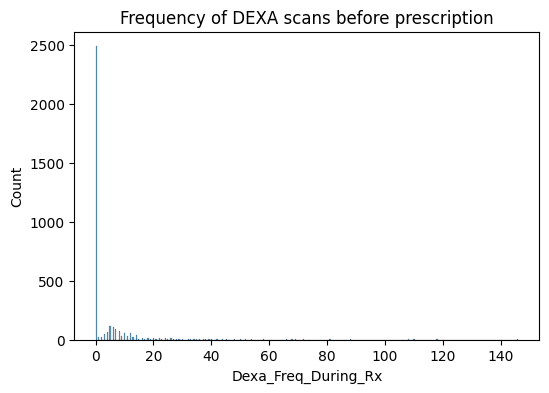

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 4))
sns.histplot(x = 'Dexa_Freq_During_Rx', data = df)
plt.title('Frequency of DEXA scans before prescription')
plt.show()

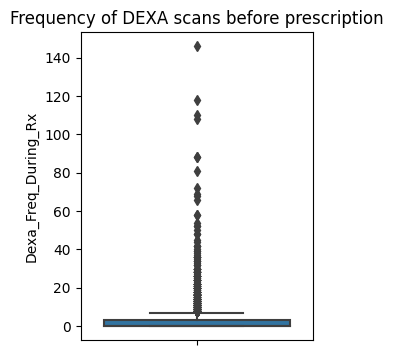

In [15]:
f, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(y=df['Dexa_Freq_During_Rx'])
plt.title('Frequency of DEXA scans before prescription')
plt.show()

In [16]:
df['Count_Of_Risks'].value_counts()

1    1242
0     970
2     781
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

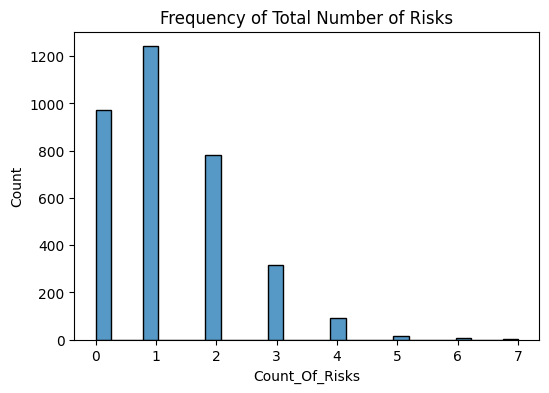

In [17]:
f, ax = plt.subplots(figsize=(6, 4))
sns.histplot(x = 'Count_Of_Risks', data = df)
plt.title('Frequency of Total Number of Risks')
plt.show()

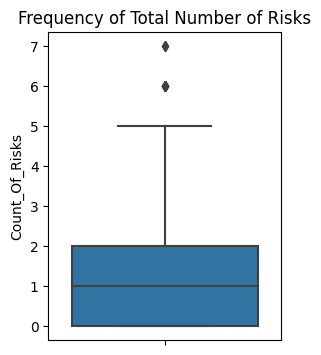

In [18]:
f, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(y=df['Count_Of_Risks'])
plt.title('Frequency of Total Number of Risks')
plt.show()

In [19]:
#create separate dataset for ordinal conversion
df_ordinal = df.drop(columns = 'Ptid')

In [20]:
le = LabelEncoder()

In [21]:
df_ordinal['Persistency_Flag'] = le.fit_transform(df['Persistency_Flag'])

In [22]:
#demographics, columns 1-5
df_ordinal['Gender'] = le.fit_transform(df['Gender'])
df_ordinal['Race'] = le.fit_transform(df['Race'])
df_ordinal['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df_ordinal['Region'] = le.fit_transform(df['Region'])
df_ordinal['Age_Bucket'] = le.fit_transform(df['Age_Bucket'])

In [23]:
#provider attributes, columns 6-8, 22
df_ordinal['Ntm_Speciality'] = le.fit_transform(df['Ntm_Speciality'])
df_ordinal['Ntm_Specialist_Flag'] = le.fit_transform(df['Ntm_Specialist_Flag'])
df_ordinal['Ntm_Speciality_Bucket'] = le.fit_transform(df['Ntm_Speciality_Bucket'])
df_ordinal['Idn_Indicator'] = le.fit_transform(df['Idn_Indicator'])

In [24]:
#clinical factors, columns 9-21, 23
df_ordinal['Gluco_Record_Prior_Ntm'] = le.fit_transform(df['Gluco_Record_Prior_Ntm'])
df_ordinal['Gluco_Record_During_Rx'] = le.fit_transform(df['Gluco_Record_During_Rx'])
#df_ordinal['Dexa_Freq_During_Rx'] = le.fit_transform(df['Dexa_Freq_During_Rx'])
df_ordinal['Dexa_During_Rx'] = le.fit_transform(df['Dexa_During_Rx'])
df_ordinal['Frag_Frac_Prior_Ntm'] = le.fit_transform(df['Frag_Frac_Prior_Ntm'])
df_ordinal['Frag_Frac_During_Rx'] = le.fit_transform(df['Frag_Frac_During_Rx'])
df_ordinal['Risk_Segment_Prior_Ntm'] = le.fit_transform(df['Risk_Segment_Prior_Ntm'])
df_ordinal['Tscore_Bucket_Prior_Ntm'] = le.fit_transform(df['Tscore_Bucket_Prior_Ntm'])
df_ordinal['Risk_Segment_During_Rx'] = le.fit_transform(df['Risk_Segment_During_Rx'])
df_ordinal['Tscore_Bucket_During_Rx'] = le.fit_transform(df['Tscore_Bucket_During_Rx'])
df_ordinal['Change_T_Score'] = le.fit_transform(df['Change_T_Score'])
df_ordinal['Change_Risk_Segment'] = le.fit_transform(df['Change_Risk_Segment'])
df_ordinal['Adherent_Flag'] = le.fit_transform(df['Adherent_Flag'])
df_ordinal['Injectable_Experience_During_Rx'] = le.fit_transform(df['Injectable_Experience_During_Rx'])

In [25]:
#comorbidity details, columns 24-37
df_ordinal['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'] = le.fit_transform(df['Comorb_Encounter_For_Screening_For_Malignant_Neoplasms'])
df_ordinal['Comorb_Encounter_For_Immunization'] = le.fit_transform(df['Comorb_Encounter_For_Immunization'])
df_ordinal['Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'] = le.fit_transform(df['Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx'])
df_ordinal['Comorb_Vitamin_D_Deficiency'] = le.fit_transform(df['Comorb_Vitamin_D_Deficiency'])
df_ordinal['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'] = le.fit_transform(df['Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified'])
df_ordinal['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'] = le.fit_transform(df['Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx'])
df_ordinal['Comorb_Long_Term_Current_Drug_Therapy'] = le.fit_transform(df['Comorb_Long_Term_Current_Drug_Therapy'])
df_ordinal['Comorb_Dorsalgia'] = le.fit_transform(df['Comorb_Dorsalgia'])
df_ordinal['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'] = le.fit_transform(df['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'])
df_ordinal['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'] = le.fit_transform(df['Comorb_Other_Disorders_Of_Bone_Density_And_Structure'])
df_ordinal['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'] = le.fit_transform(df['Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias'])
df_ordinal['Comorb_Osteoporosis_without_current_pathological_fracture'] = le.fit_transform(df['Comorb_Osteoporosis_without_current_pathological_fracture'])
df_ordinal['Comorb_Personal_history_of_malignant_neoplasm'] = le.fit_transform(df['Comorb_Personal_history_of_malignant_neoplasm'])
df_ordinal['Comorb_Gastro_esophageal_reflux_disease'] = le.fit_transform(df['Comorb_Gastro_esophageal_reflux_disease'])

In [26]:
#concomitancy details, columns 38-47
df_ordinal['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'] = le.fit_transform(df['Concom_Cholesterol_And_Triglyceride_Regulating_Preparations'])
df_ordinal['Concom_Narcotics'] = le.fit_transform(df['Concom_Narcotics'])
df_ordinal['Concom_Systemic_Corticosteroids_Plain'] = le.fit_transform(df['Concom_Systemic_Corticosteroids_Plain'])
df_ordinal['Concom_Anti_Depressants_And_Mood_Stabilisers'] = le.fit_transform(df['Concom_Anti_Depressants_And_Mood_Stabilisers'])
df_ordinal['Concom_Fluoroquinolones'] = le.fit_transform(df['Concom_Fluoroquinolones'])
df_ordinal['Concom_Cephalosporins'] = le.fit_transform(df['Concom_Cephalosporins'])
df_ordinal['Concom_Macrolides_And_Similar_Types'] = le.fit_transform(df['Concom_Macrolides_And_Similar_Types'])
df_ordinal['Concom_Broad_Spectrum_Penicillins'] = le.fit_transform(df['Concom_Broad_Spectrum_Penicillins'])
df_ordinal['Concom_Anaesthetics_General'] = le.fit_transform(df['Concom_Anaesthetics_General'])
df_ordinal['Concom_Viral_Vaccines'] = le.fit_transform(df['Concom_Viral_Vaccines'])

In [27]:
#risk factors, columns 48-67
df_ordinal['Risk_Type_1_Insulin_Dependent_Diabetes'] = le.fit_transform(df['Risk_Type_1_Insulin_Dependent_Diabetes'])
df_ordinal['Risk_Osteogenesis_Imperfecta'] = le.fit_transform(df['Risk_Osteogenesis_Imperfecta'])
df_ordinal['Risk_Rheumatoid_Arthritis'] = le.fit_transform(df['Risk_Rheumatoid_Arthritis'])
df_ordinal['Risk_Untreated_Chronic_Hyperthyroidism'] = le.fit_transform(df['Risk_Untreated_Chronic_Hyperthyroidism'])
df_ordinal['Risk_Untreated_Chronic_Hypogonadism'] = le.fit_transform(df['Risk_Untreated_Chronic_Hypogonadism'])
df_ordinal['Risk_Untreated_Early_Menopause'] = le.fit_transform(df['Risk_Untreated_Early_Menopause'])
df_ordinal['Risk_Patient_Parent_Fractured_Their_Hip'] = le.fit_transform(df['Risk_Patient_Parent_Fractured_Their_Hip'])
df_ordinal['Risk_Smoking_Tobacco'] = le.fit_transform(df['Risk_Smoking_Tobacco'])
df_ordinal['Risk_Chronic_Malnutrition_Or_Malabsorption'] = le.fit_transform(df['Risk_Chronic_Malnutrition_Or_Malabsorption'])
df_ordinal['Risk_Chronic_Liver_Disease'] = le.fit_transform(df['Risk_Chronic_Liver_Disease'])
df_ordinal['Risk_Family_History_Of_Osteoporosis'] = le.fit_transform(df['Risk_Family_History_Of_Osteoporosis'])
df_ordinal['Risk_Low_Calcium_Intake'] = le.fit_transform(df['Risk_Low_Calcium_Intake'])
df_ordinal['Risk_Vitamin_D_Insufficiency'] = le.fit_transform(df['Risk_Vitamin_D_Insufficiency'])
df_ordinal['Risk_Poor_Health_Frailty'] = le.fit_transform(df['Risk_Poor_Health_Frailty'])
df_ordinal['Risk_Excessive_Thinness'] = le.fit_transform(df['Risk_Excessive_Thinness'])
df_ordinal['Risk_Hysterectomy_Oophorectomy'] = le.fit_transform(df['Risk_Hysterectomy_Oophorectomy'])
df_ordinal['Risk_Estrogen_Deficiency'] = le.fit_transform(df['Risk_Estrogen_Deficiency'])
df_ordinal['Risk_Immobilization'] = le.fit_transform(df['Risk_Immobilization'])
df_ordinal['Risk_Recurring_Falls'] = le.fit_transform(df['Risk_Recurring_Falls'])

In [28]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Persistency_Flag                                                    3424 non-null   int64
 1   Gender                                                              3424 non-null   int64
 2   Race                                                                3424 non-null   int64
 3   Ethnicity                                                           3424 non-null   int64
 4   Region                                                              3424 non-null   int64
 5   Age_Bucket                                                          3424 non-null   int64
 6   Ntm_Speciality                                                      3424 non-null   int64
 7   Ntm_Specialist_Flag              

In [29]:
demographics = df_ordinal.iloc[:,:6]
demographics


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket
0,1,1,2,1,4,3
1,0,1,1,1,4,0
2,0,0,3,0,0,1
3,0,0,2,1,0,3
4,0,0,2,1,0,3
...,...,...,...,...,...,...
3419,1,0,2,1,3,3
3420,1,0,2,1,3,3
3421,1,0,2,1,3,3
3422,0,0,2,1,3,0


In [30]:
provider_attributes = df_ordinal.iloc[:,[6, 7, 8, 22]]
provider_attributes

,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Idn_Indicator
0,5,0,1,0
1,5,0,1,0
2,5,0,1,0
3,5,0,1,0
4,5,0,1,0
...,...,...,...,...
3419,5,0,1,1
3420,34,0,1,1
3421,3,1,0,1
3422,34,0,1,1


In [31]:
clinical_factors = df_ordinal.iloc[:, 9:24]
clinical_factors = clinical_factors.drop(columns = 'Idn_Indicator')
clinical_factors

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Injectable_Experience_During_Rx
0,0,0,0,0,0,0,1,1,2,0,1,2,0,1
1,0,0,0,0,0,0,1,1,1,2,2,2,0,1
2,0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,0,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,0,0,1,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,0,0,0,0,0,1,1,1,2,2,2,0,1
3420,0,0,0,0,0,0,0,0,1,2,2,2,1,1
3421,0,0,7,1,0,0,1,1,0,0,1,3,0,1
3422,0,0,0,0,0,1,1,1,1,2,2,2,0,1


In [32]:
comorbidity_details = df_ordinal.iloc[:, 24:38]
comorbidity_details

,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease
0,0,1,1,0,0,1,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,1,0,0,1,0,0,1
4,1,1,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,0,1,1,0,0,0,1,0,1,1,0,0,1
3420,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421,1,0,0,1,1,0,0,0,0,0,1,0,0,0
3422,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
concomitancy_details = df_ordinal.iloc[:, 38:48]
concomitancy_details

,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,1
4,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3419,1,1,1,1,1,0,0,0,0,0
3420,0,0,0,1,0,1,0,0,0,0
3421,1,1,0,0,0,0,0,0,1,0
3422,0,1,0,1,0,0,0,0,0,0


In [34]:
risk_factors = df_ordinal.iloc[:, 48:68]
risk_factors

,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3421,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
grouped_data = df_ordinal.groupby('Gender')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Gender')

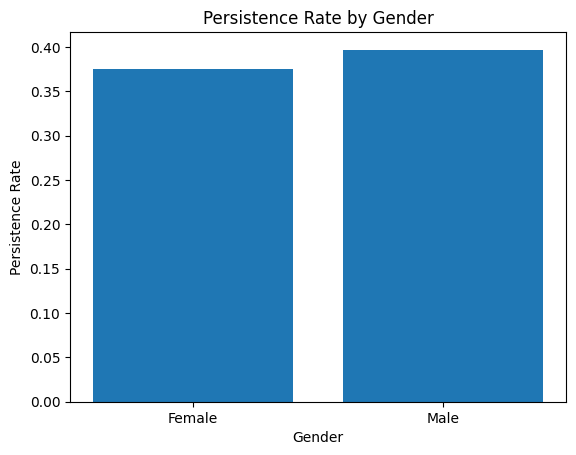

In [36]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Gender')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Female', 'Male'])
plt.title('Persistence Rate by Gender')
plt.show()

In [37]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.0006084476607102172, pvalue=0.9803207911308529)

In [38]:
grouped_data = df_ordinal.groupby('Race')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Race')

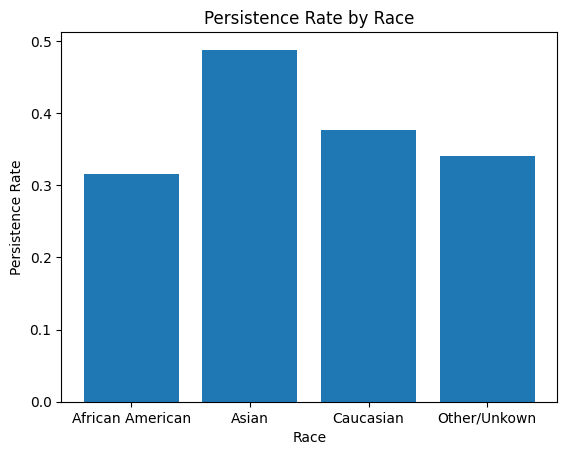

In [39]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Race')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['African American', 'Asian', 'Caucasian', 'Other/Unkown'])
plt.title('Persistence Rate by Race')
plt.show()

In [40]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.04578380151469388, pvalue=0.9974300226575612)

In [41]:
grouped_data = df_ordinal.groupby('Region')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Region')

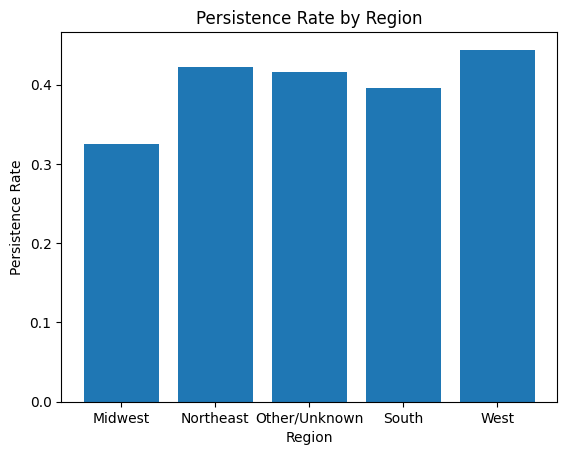

In [42]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Region')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Midwest', 'Northeast', 'Other/Unknown', 'South', 'West'])
plt.title('Persistence Rate by Region')
plt.show()

In [43]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.021016582554621265, pvalue=0.9999451731771251)

In [44]:
grouped_data = df_ordinal.groupby('Age_Bucket')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Age_Bucket')

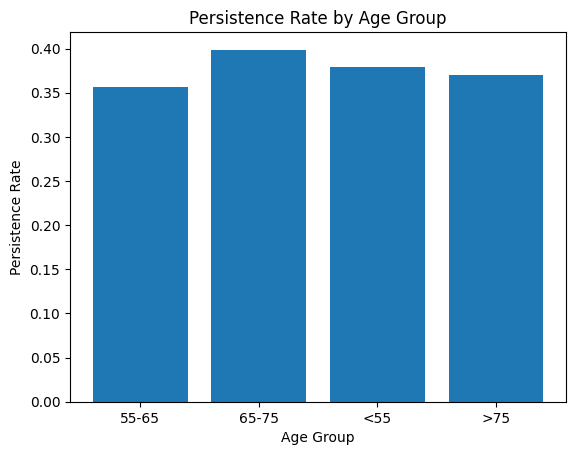

In [45]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Age Group')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['55-65', '65-75', '<55', '>75'])
plt.title('Persistence Rate by Age Group')
plt.show()

In [46]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.002566494844899103, pvalue=0.9999654462615714)

In [47]:
grouped_data = df_ordinal.groupby('Ntm_Specialist_Flag')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Ntm_Specialist_Flag')

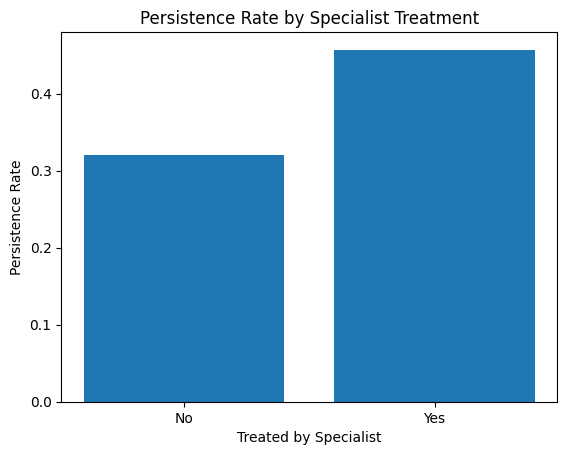

In [48]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Treated by Specialist')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['No' , 'Yes'])
plt.title('Persistence Rate by Specialist Treatment')
plt.show()

In [49]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.024225700345256066, pvalue=0.8763120056982856)

In [50]:
grouped_data = df_ordinal.groupby('Gluco_Record_Prior_Ntm')['Persistency_Flag'].mean()
grouped_data.index


Int64Index([0, 1], dtype='int64', name='Gluco_Record_Prior_Ntm')

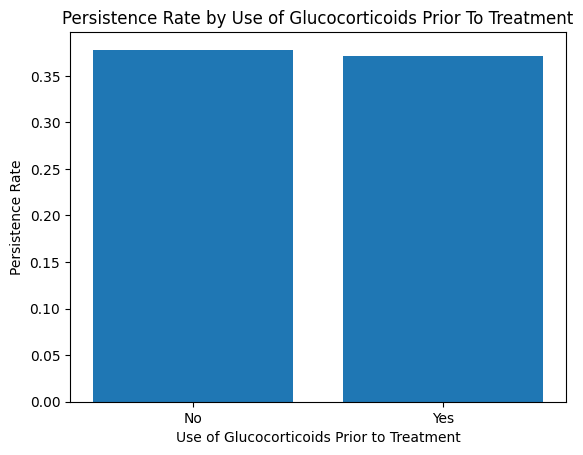

In [51]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Use of Glucocorticoids Prior to Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['No', 'Yes'])
plt.title('Persistence Rate by Use of Glucocorticoids Prior To Treatment')
plt.show()

In [52]:
chisquare(grouped_data)

Power_divergenceResult(statistic=5.7742197744709486e-05, pvalue=0.993937070240985)

In [53]:
grouped_data = df_ordinal.groupby('Gluco_Record_During_Rx')['Persistency_Flag'].mean()
grouped_data.index


Int64Index([0, 1], dtype='int64', name='Gluco_Record_During_Rx')

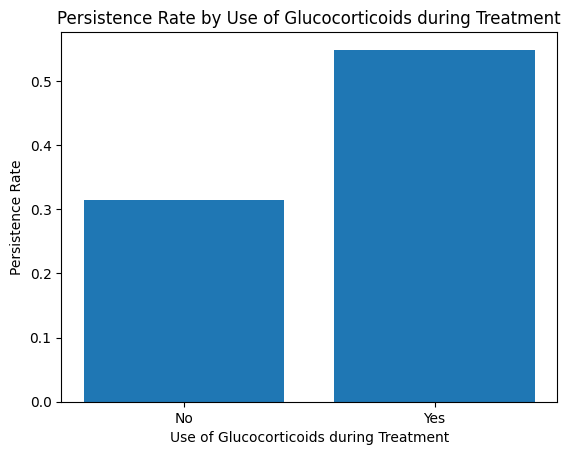

In [54]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Use of Glucocorticoids during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['No', 'Yes'])
plt.title('Persistence Rate by Use of Glucocorticoids during Treatment')
plt.show()

In [55]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.06337706286067948, pvalue=0.8012358416150446)

In [56]:
grouped_data = df_ordinal.groupby('Risk_Segment_Prior_Ntm')['Persistency_Flag'].mean()
grouped_data.index


Int64Index([0, 1], dtype='int64', name='Risk_Segment_Prior_Ntm')

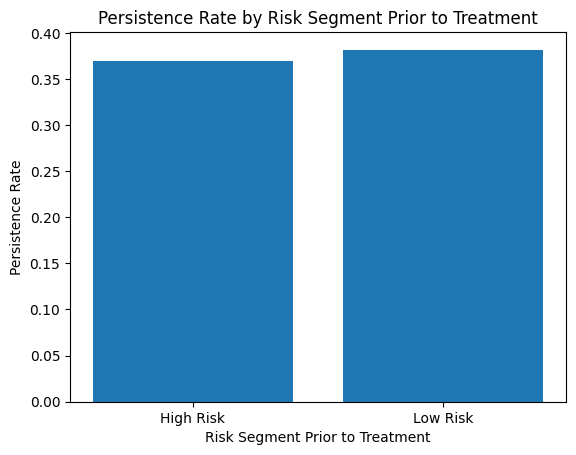

In [57]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Risk Segment Prior to Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['High Risk', 'Low Risk'])
plt.title('Persistence Rate by Risk Segment Prior to Treatment')
plt.show()

In [58]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.000189800590254928, pvalue=0.9890080409245847)

In [59]:
grouped_data = df_ordinal.groupby('Risk_Segment_During_Rx')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2], dtype='int64', name='Risk_Segment_During_Rx')

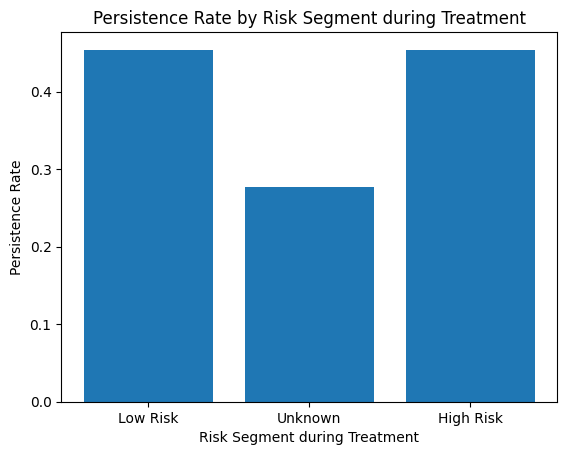

In [60]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Risk Segment during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Low Risk', 'Unknown', 'High Risk'])
plt.title('Persistence Rate by Risk Segment during Treatment')
plt.show()

In [61]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.05250852666079812, pvalue=0.974087383416576)

In [62]:
grouped_data = df_ordinal.groupby('Change_Risk_Segment')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Change_Risk_Segment')

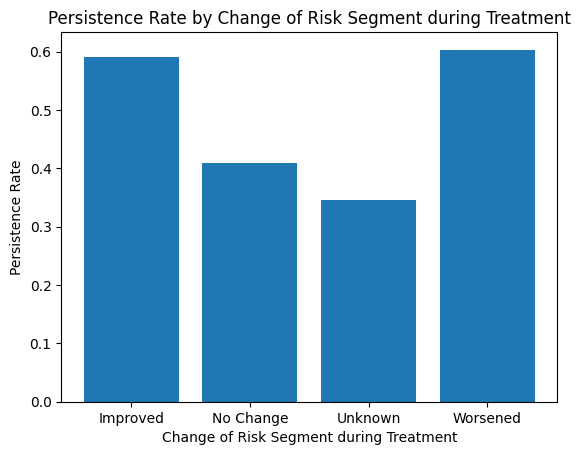

In [63]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Change of Risk Segment during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Improved', 'No Change', 'Unknown', 'Worsened'])
plt.title('Persistence Rate by Change of Risk Segment during Treatment')
plt.show()

In [64]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.10272097961399373, pvalue=0.9915089083827511)

In [65]:
grouped_data = df_ordinal.groupby('Tscore_Bucket_Prior_Ntm')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Tscore_Bucket_Prior_Ntm')

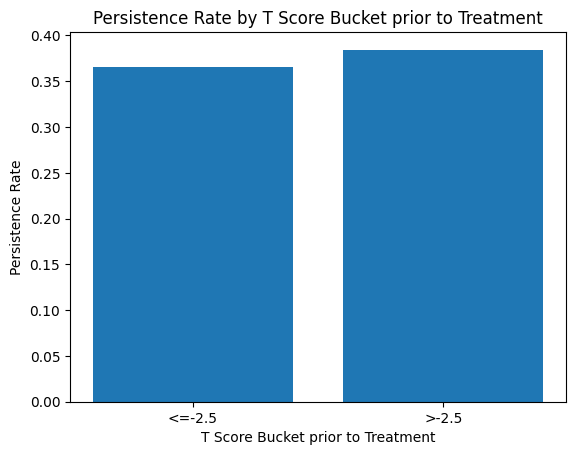

In [66]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('T Score Bucket prior to Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['<=-2.5' , '>-2.5'])
plt.title('Persistence Rate by T Score Bucket prior to Treatment')
plt.show()

In [67]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.00045604660770883344, pvalue=0.9829622725143766)

In [68]:
grouped_data = df_ordinal.groupby('Tscore_Bucket_During_Rx')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2], dtype='int64', name='Tscore_Bucket_During_Rx')

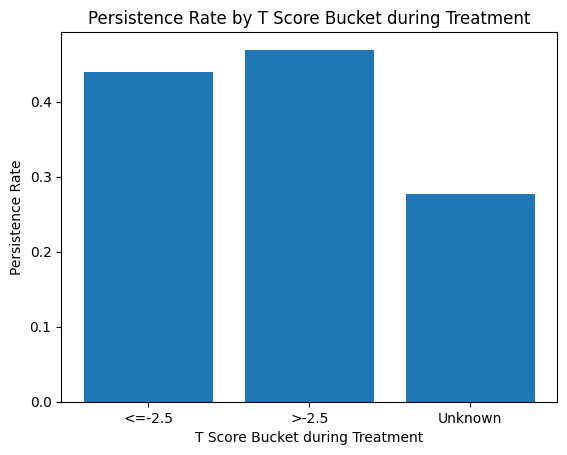

In [69]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('T Score Bucket during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['<=-2.5' , '>-2.5', 'Unknown'])
plt.title('Persistence Rate by T Score Bucket during Treatment')
plt.show()

In [70]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.054042650500116196, pvalue=0.9733404845737887)

In [71]:
grouped_data = df_ordinal.groupby('Change_T_Score')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3], dtype='int64', name='Change_T_Score')

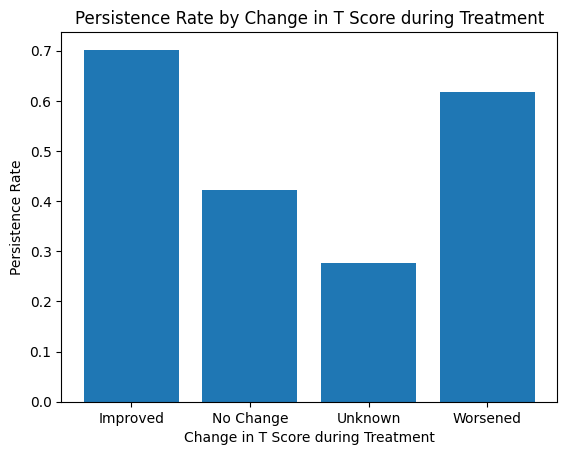

In [72]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Change in T Score during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Improved', 'No Change', 'Unknown', 'Worsened'])
plt.title('Persistence Rate by Change in T Score during Treatment')
plt.show()

In [73]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.21872836912388355, pvalue=0.9745107310004432)

In [74]:
grouped_data = df_ordinal.groupby('Adherent_Flag')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Adherent_Flag')

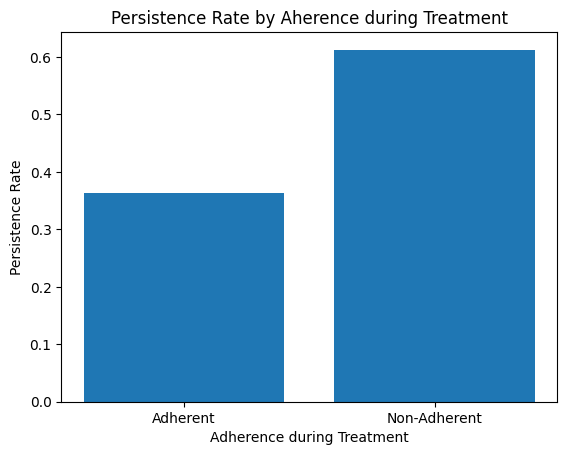

In [75]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Adherence during Treatment')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['Adherent' , 'Non-Adherent'])
plt.title('Persistence Rate by Aherence during Treatment')
plt.show()

In [76]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.0633989678480597, pvalue=0.8012022148596367)

In [77]:
grouped_data = df_ordinal.groupby('Count_Of_Risks')['Persistency_Flag'].mean()
grouped_data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='Count_Of_Risks')

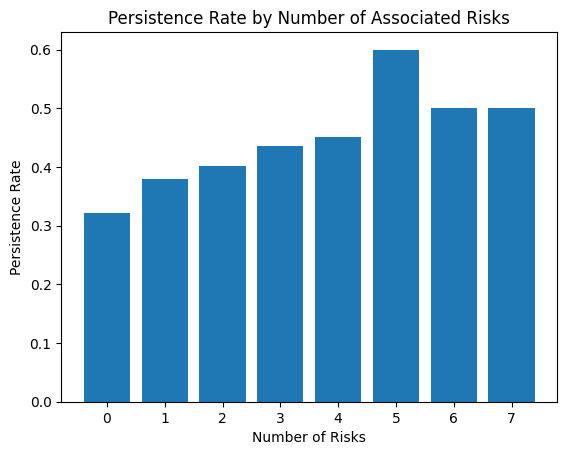

In [78]:
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Number of Risks')
plt.ylabel('Persistence Rate')
plt.xticks(grouped_data.index, ['0', '1', '2', '3', '4', '5', '6', '7'])
plt.title('Persistence Rate by Number of Associated Risks')
plt.show()

In [79]:
chisquare(grouped_data)

Power_divergenceResult(statistic=0.11476086299476318, pvalue=0.9999962789166591)

In [80]:
corr = clinical_factors.corr()

<AxesSubplot:>

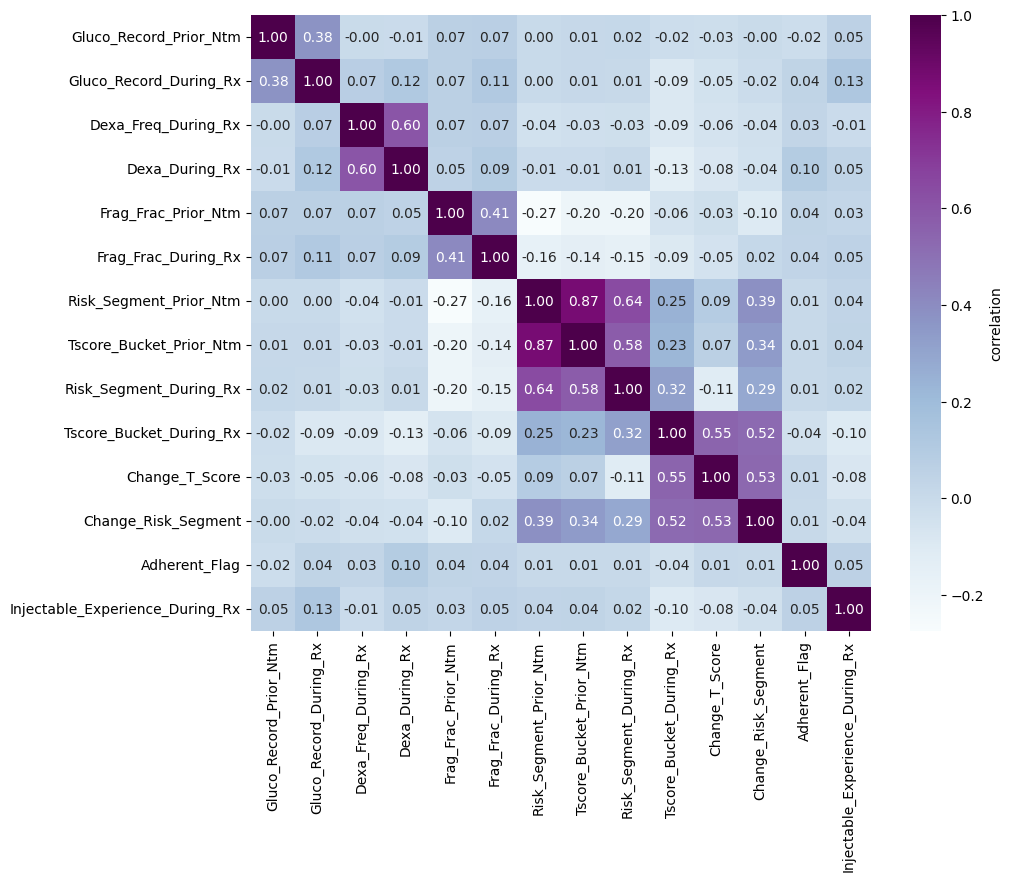

In [81]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [82]:
corr = comorbidity_details.corr()

<AxesSubplot:>

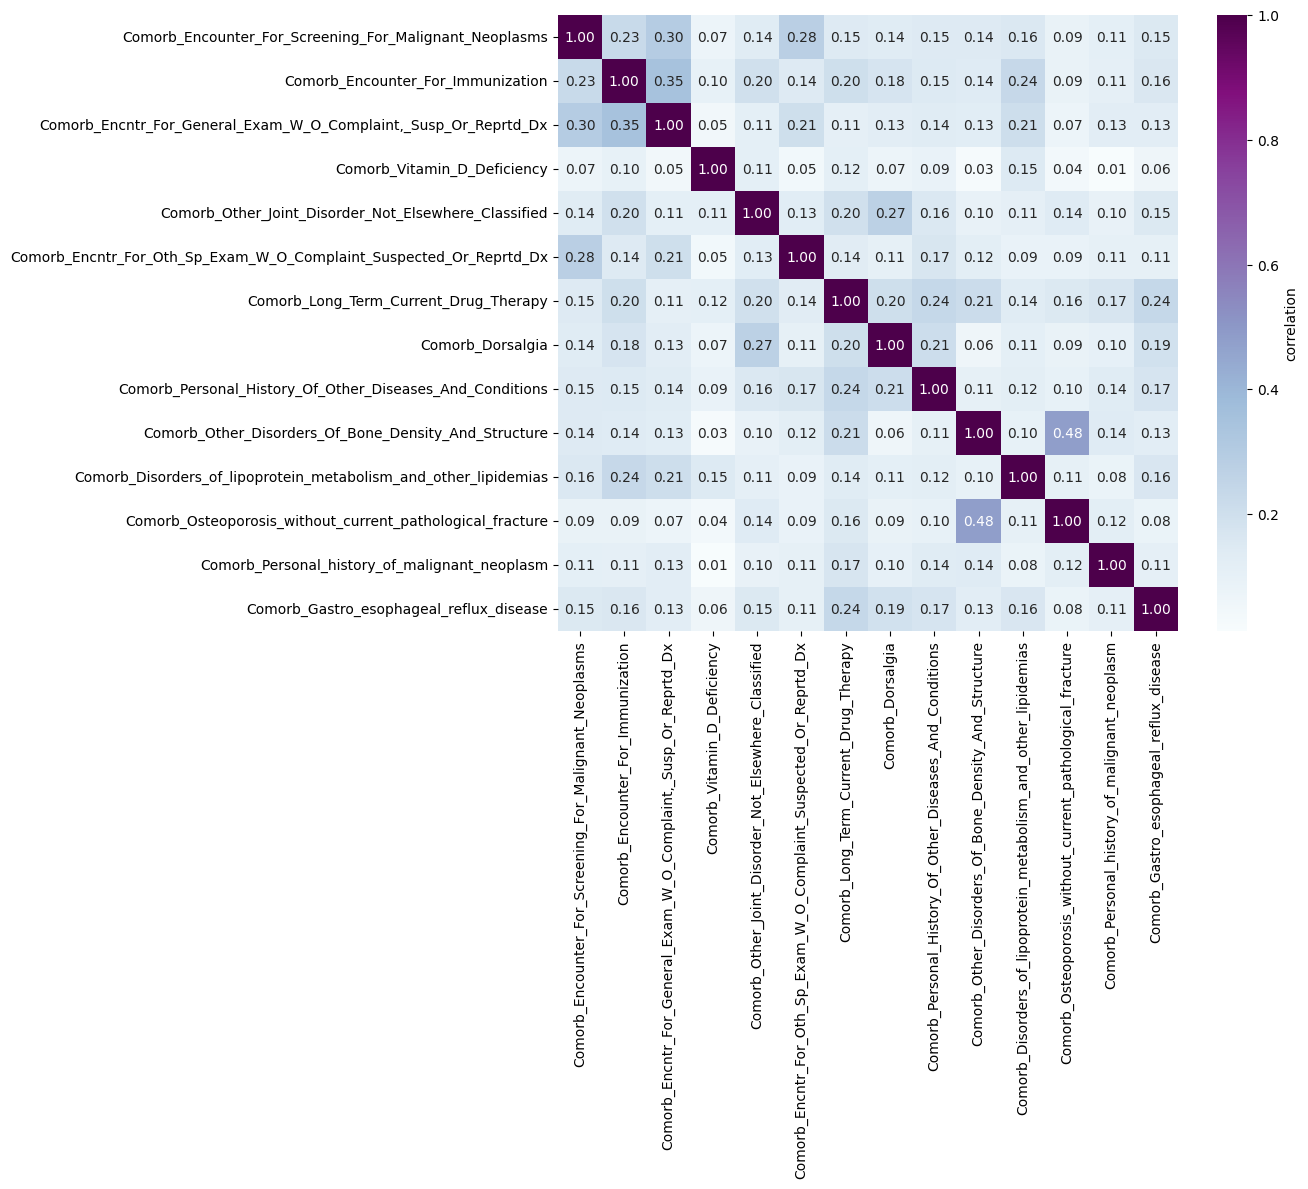

In [83]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [84]:
corr = concomitancy_details.corr()

<AxesSubplot:>

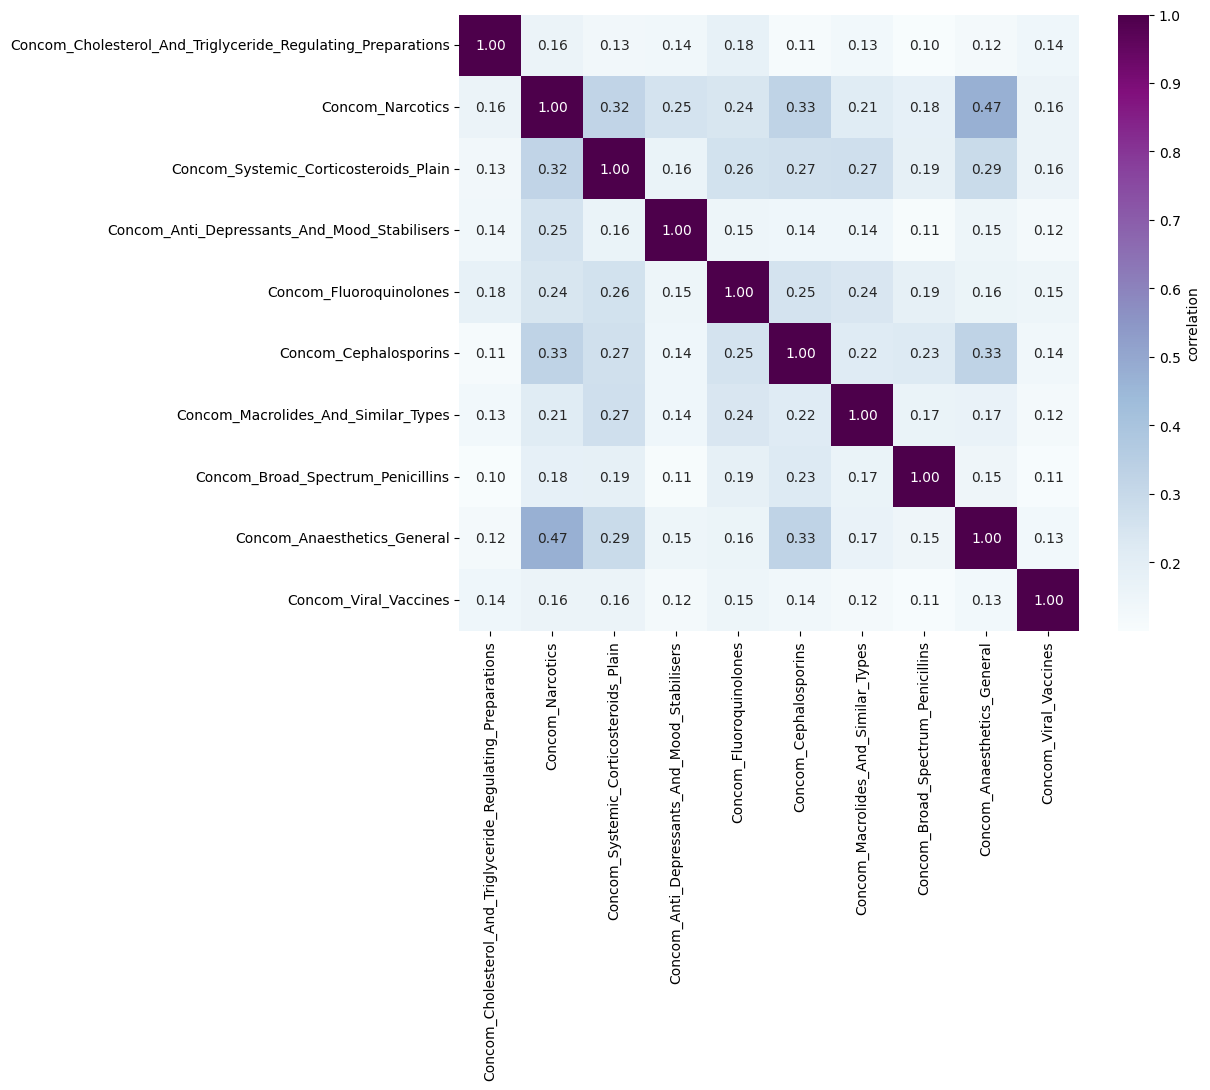

In [85]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [86]:
corr = risk_factors.corr()

<AxesSubplot:>

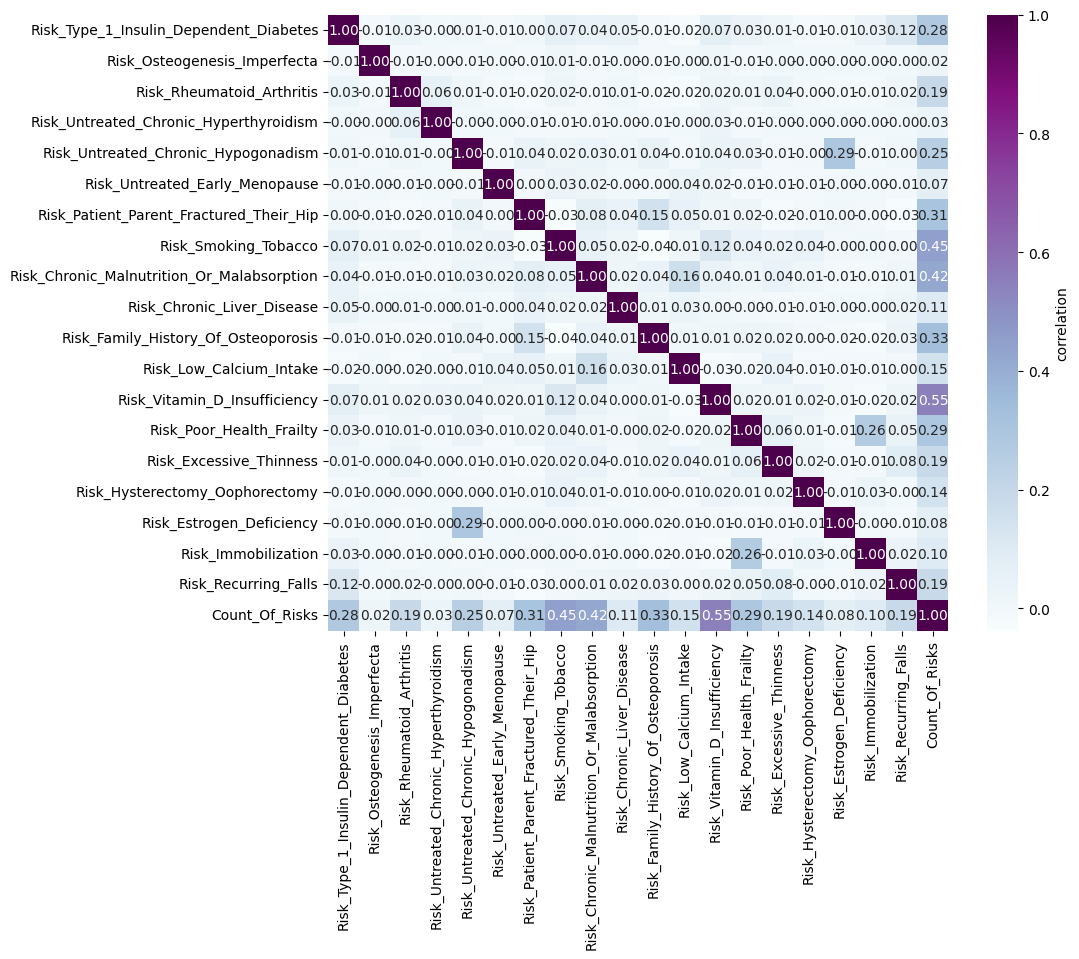

In [87]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu", cbar_kws={'label': 'correlation'}, fmt='.2f')

In [88]:
X = df_ordinal.drop(columns=['Persistency_Flag'])
Y = df_ordinal['Persistency_Flag']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [90]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [91]:
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [92]:
y_pred = model.predict(x_test)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       640
           1       0.78      0.69      0.74       388

    accuracy                           0.81      1028
   macro avg       0.81      0.79      0.80      1028
weighted avg       0.81      0.81      0.81      1028



In [94]:
from sklearn.metrics import accuracy_score
print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy : 0.81


In [95]:
print("Accuracy: ", round(model.score(x_test, y_test) * 100, 2))

Accuracy:  81.23


In [96]:
coefficients = model.coef_[0]

<AxesSubplot:ylabel='Feature'>

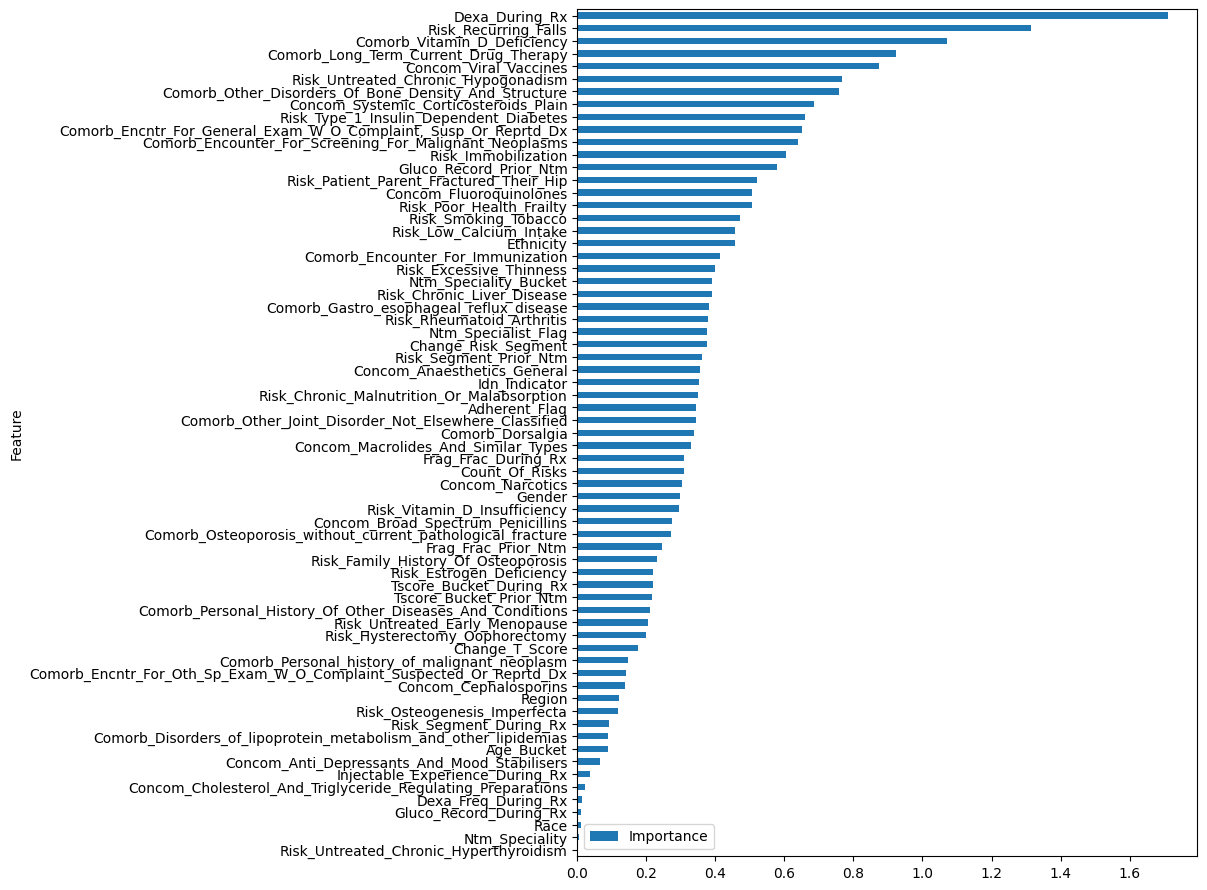

In [97]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 11))

In [98]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit(maxiter = 100)
print(result.summary2())

         Current function value: 0.403679
         Iterations: 100
                                                           Results: Logit
Model:                                      Logit                                  Pseudo R-squared:                       0.390    
Dependent Variable:                         Persistency_Flag                       AIC:                                    2896.3961
Date:                                       2023-06-03 18:33                       BIC:                                    3301.5413
No. Observations:                           3424                                   Log-Likelihood:                         -1382.2  
Df Model:                                   65                                     LL-Null:                                -2267.7  
Df Residuals:                               3358                                   LLR p-value:                            0.0000   
Converged:                                  0.0000           

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [99]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred, pos_label=1)

In [100]:
roc_auc1 = roc_auc_score(y_test, y_pred)
roc_auc1

0.7888369845360825

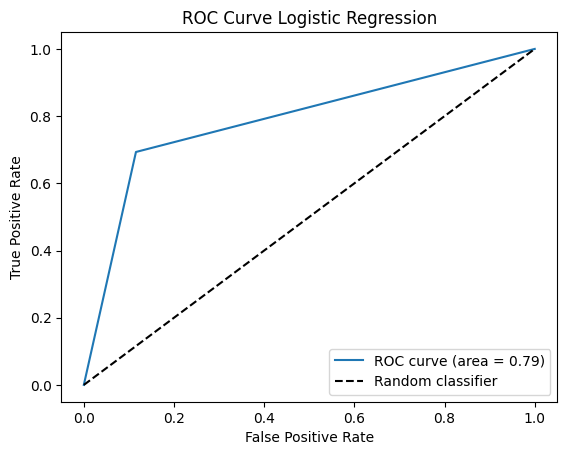

In [101]:
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [102]:
pca = PCA()
X_new = pca.fit_transform(X)

In [103]:
pca.get_covariance()

array([[ 5.34642646e-02,  8.84785713e-04,  1.57657381e-03, ...,
         6.04077420e-05,  1.19501530e-03,  7.41957238e-04],
       [ 8.84785713e-04,  1.61218281e-01, -2.73498612e-03, ...,
         2.11427097e-04, -4.18673432e-04,  1.13648464e-04],
       [ 1.57657381e-03, -2.73498612e-03,  5.52105432e-02, ...,
         8.36152361e-06,  3.33351763e-04, -1.41173234e-02],
       ...,
       [ 6.04077420e-05,  2.11427097e-04,  8.36152361e-06, ...,
         4.07325650e-03,  2.09720664e-04,  6.90832494e-03],
       [ 1.19501530e-03, -4.18673432e-04,  3.33351763e-04, ...,
         2.09720664e-04,  1.97515399e-02,  2.87687605e-02],
       [ 7.41957238e-04,  1.13648464e-04, -1.41173234e-02, ...,
         6.90832494e-03,  2.87687605e-02,  1.19883771e+00]])

In [104]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([6.37636013e-01, 2.96471885e-01, 1.16770609e-02, 7.30329665e-03,
       6.95773524e-03, 4.82511277e-03, 3.56453615e-03, 2.75827864e-03,
       1.73484854e-03, 1.58359146e-03, 1.32457152e-03, 1.28136168e-03,
       1.19565451e-03, 1.11682371e-03, 9.97477170e-04, 9.11333500e-04,
       8.81923246e-04, 8.09742400e-04, 7.72546927e-04, 7.52504323e-04,
       7.41487527e-04, 7.07826853e-04, 6.71909835e-04, 6.67064269e-04,
       6.25652958e-04, 6.15433516e-04, 6.02714453e-04, 5.91155538e-04,
       5.80497775e-04, 5.75460881e-04, 5.39149484e-04, 5.30428272e-04,
       5.20591877e-04, 4.93855303e-04, 4.85252451e-04, 4.74905423e-04,
       4.60445623e-04, 4.44249836e-04, 4.42687184e-04, 4.17398908e-04,
       3.51806961e-04, 3.35589266e-04, 3.23437959e-04, 3.15745709e-04,
       3.03790987e-04, 2.77460953e-04, 2.74295545e-04, 2.55553582e-04,
       2.38476450e-04, 2.25692464e-04, 2.00988006e-04, 1.86627027e-04,
       1.63250644e-04, 1.55187531e-04, 1.41700825e-04, 1.31523745e-04,
      

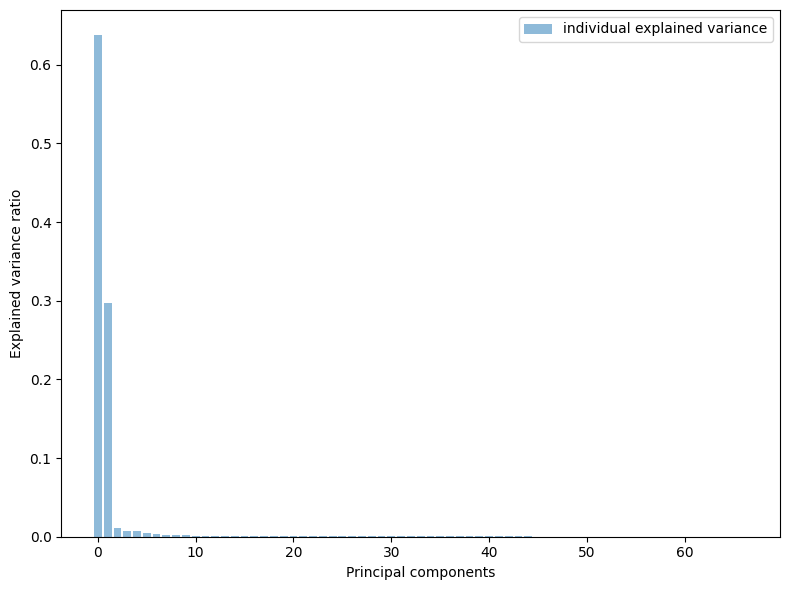

In [105]:
plt.figure(figsize=(8, 6))
plt.bar(range(67), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [106]:
sum(explained_variance[:32]) #there is a subset of components for which max performance of pca data is 84%, but this varies with every run

0.9920050790179006

In [117]:
pca=PCA(n_components=64)
X_new=pca.fit_transform(X)

In [118]:
x_train_new, x_test_new, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3)

In [119]:
modelpca = LogisticRegression(max_iter=500)
modelpca.fit(x_train_new, y_train)

LogisticRegression(max_iter=500)

In [120]:
y_pred_new = modelpca.predict(x_test_new)

In [121]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       639
           1       0.77      0.70      0.74       389

    accuracy                           0.81      1028
   macro avg       0.80      0.79      0.79      1028
weighted avg       0.81      0.81      0.81      1028



In [122]:
print("Accuracy : {:.2f}".format(accuracy_score(y_test, y_pred_new)))

Accuracy : 0.81


In [123]:
logit_modelpca=sm.Logit(Y,X_new)
resultpca=logit_modelpca.fit()
print(resultpca.summary2())

Optimization terminated successfully.
         Current function value: 0.422921
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.361      
Dependent Variable: Persistency_Flag AIC:              3024.1625  
Date:               2023-06-03 18:33 BIC:              3417.0306  
No. Observations:   3424             Log-Likelihood:   -1448.1    
Df Model:           63               LL-Null:          -2267.7    
Df Residuals:       3360             LLR p-value:      5.5606e-301
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        -0.0045     0.0039    -1.1551   0.2480   -0.0120    0.0031
x2         0.1544     0.0109    14.1301   0.0

In [124]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_new, pos_label=1)

In [125]:
roc_auc2 = roc_auc_score(y_test, y_pred_new)
roc_auc2

0.7877990594236657

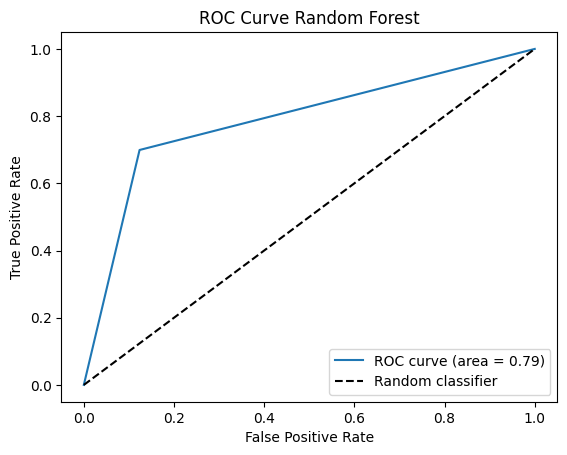

In [126]:
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc="lower right")
plt.show()